In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

C:\Users\16088\anaconda3\lib\site-packages\dask\dataframe\_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


In [2]:
data = pd.read_csv("heart.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
X = data.drop('target', axis=1)
y = data['target']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier(), 
    'Naive Bayes': GaussianNB(),       
    'MLP Neural Network': MLPClassifier() 
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205

Decision Tree Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Random Forest Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99  

C:\Users\16088\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Model Accuracy

In [10]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")

Logistic Regression Accuracy: 0.80
Decision Tree Accuracy: 0.99
Random Forest Accuracy: 0.99
SVM Accuracy: 0.89
KNN Accuracy: 0.83
Gradient Boosting Accuracy: 0.93
XGBoost Accuracy: 0.99
AdaBoost Accuracy: 0.88
Naive Bayes Accuracy: 0.80
MLP Neural Network Accuracy: 0.93


C:\Users\16088\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Model Comparison

C:\Users\16088\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


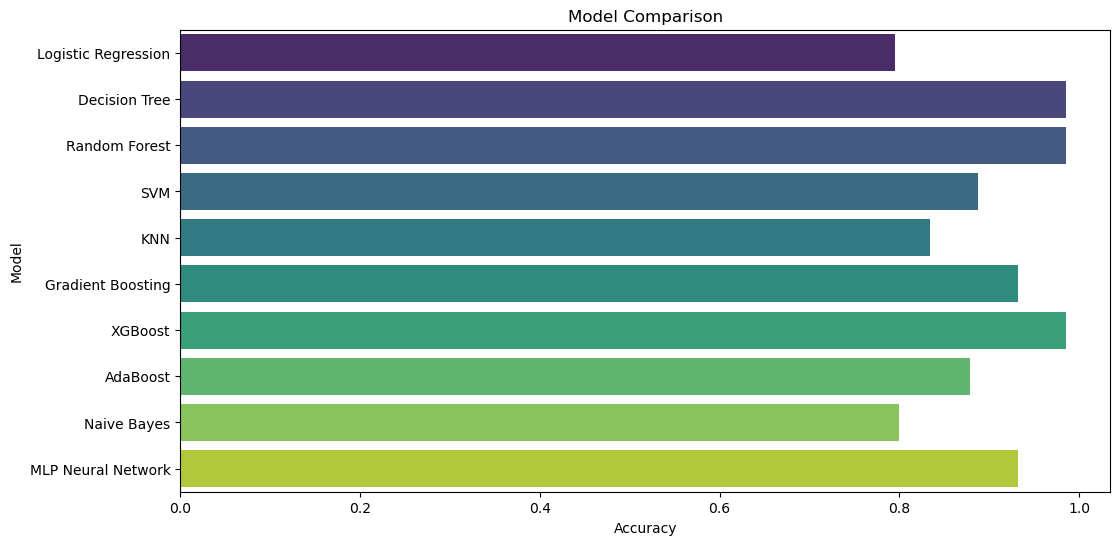

In [19]:
result = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    result.append((name,accuracy))
    
result_df = pd.DataFrame(result, columns=['Model', 'Accuracy'])

# Plotting the results
plt.figure(figsize=(12, 6))
sns.barplot(x='Accuracy', y='Model', data=result_df, palette='viridis')
plt.xlabel('Accuracy')
plt.title('Model Comparison')
plt.show()

# Conclusion

This project aimed to develop and compare the performance of various machine learning models in predicting the presence of heart disease based on a combined dataset from multiple sources. The dataset consisted of 1025 instances with 13 features, including patient demographics, clinical measurements, and test results.

The following models were trained and evaluated:

Logistic Regression
Decision Tree Classifier
Random Forest Classifier
Support Vector Classifier (SVM)
K-Nearest Neighbors (KNN)
Gradient Boosting Classifier
XGBoost Classifier
AdaBoost Classifier
Naive Bayes Classifier
MLP Neural Network
Each model was evaluated based on its accuracy in predicting the target variable on the test set. The results showed varying levels of performance across the models.

From the bar plot of model accuracies, we can observe that some models, such as the Random Forest Classifier, Decision Tree and XGBoost Classifier performed exceptionally well, achieving higher accuracy compared to others. On the other hand, models like the Logistic Regression and Naive Bayes had lower accuracy.

# Future Direction

While the current models provided valuable insights and reasonably high accuracy, there are several areas for improvement and further exploration:

Feature Engineering:

Explore and engineer additional features that might contribute to the predictive power of the models. This could include interaction terms, polynomial features, or domain-specific features derived from the existing data.